In [36]:
import pandas as pd

In [37]:
target06 = pd.read_csv("../data/processed/target06.csv")
target12 = pd.read_csv("../data/processed/target12.csv")
target24 = pd.read_csv("../data/processed/target24.csv")

### Pearson correlation coefficient
## $r_{XY} = \dfrac{cov(X,Y)}{\sigma_X \sigma_Y}$

In [38]:
target06.corr(method="pearson").drop(columns=["month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"])

,pm2_5,target
pm2_5,1.000000,0.760448
month,-0.081780,-0.081213
weekday,-0.071676,-0.059408
hour,-0.009093,0.041729
wind-east,0.214367,0.188281
wind-north,-0.121689,-0.120297
temperature,-0.330560,-0.318570
pressure,0.128520,0.146662
humidity,0.274160,0.192752
target,0.760448,1.000000


In [39]:
target12.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"])

,target
pm2_5,0.627537
month,-0.082242
weekday,-0.046090
hour,0.038302
wind-east,0.162137
wind-north,-0.119463
temperature,-0.310214
pressure,0.165054
humidity,0.140351
target,1.000000


In [40]:
target24.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"])

,target
pm2_5,0.501434
month,-0.083247
weekday,-0.032376
hour,-0.008501
wind-east,0.147756
wind-north,-0.073093
temperature,-0.359690
pressure,0.176324
humidity,0.225939
target,1.000000


### Mutual information
## $I(X;Y) = \sum_y \sum_x P_{(X,Y)} (x, y)  log \left( \dfrac{P_{(X,Y)} (x,y)}{P_X (x) P_Y (y)} \right)$
https://en.wikipedia.org/wiki/Mutual_information

In [41]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(target06[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"]], target06["pm2_5"], n_neighbors=3)

array([7.44941399e+00, 1.55461238e-01, 1.57191988e-02, 6.20711287e-03,
       7.17190304e-02, 5.16788585e-02, 1.26614841e-01, 1.18400705e-01,
       8.44839572e-02])

In [42]:
mutual_info_regression(target06[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"]], target06["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.37800143, 0.15422439, 0.02142369, 0.00416428, 0.0670141 ,
       0.05264354, 0.13521269, 0.12734159, 0.05509474])

In [43]:
mutual_info_regression(target12[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"]], target12["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.22411088, 0.16028116, 0.02655183, 0.00493742, 0.04889873,
       0.01865538, 0.14212352, 0.11246833, 0.04282657])

In [44]:
mutual_info_regression(target24[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure", "humidity"]], target24["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.17051814, 0.16046067, 0.017807  , 0.00461138, 0.06008213,
       0.03249397, 0.15632325, 0.13633437, 0.06021244])

### Scatterplots

In [45]:
import matplotlib.pyplot as plt
font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [46]:
data06 = target06.to_numpy()
data12 = target12.to_numpy()
data24 = target24.to_numpy()

Text(0.5, 0, 'PM2,5 po 24 godzinach')

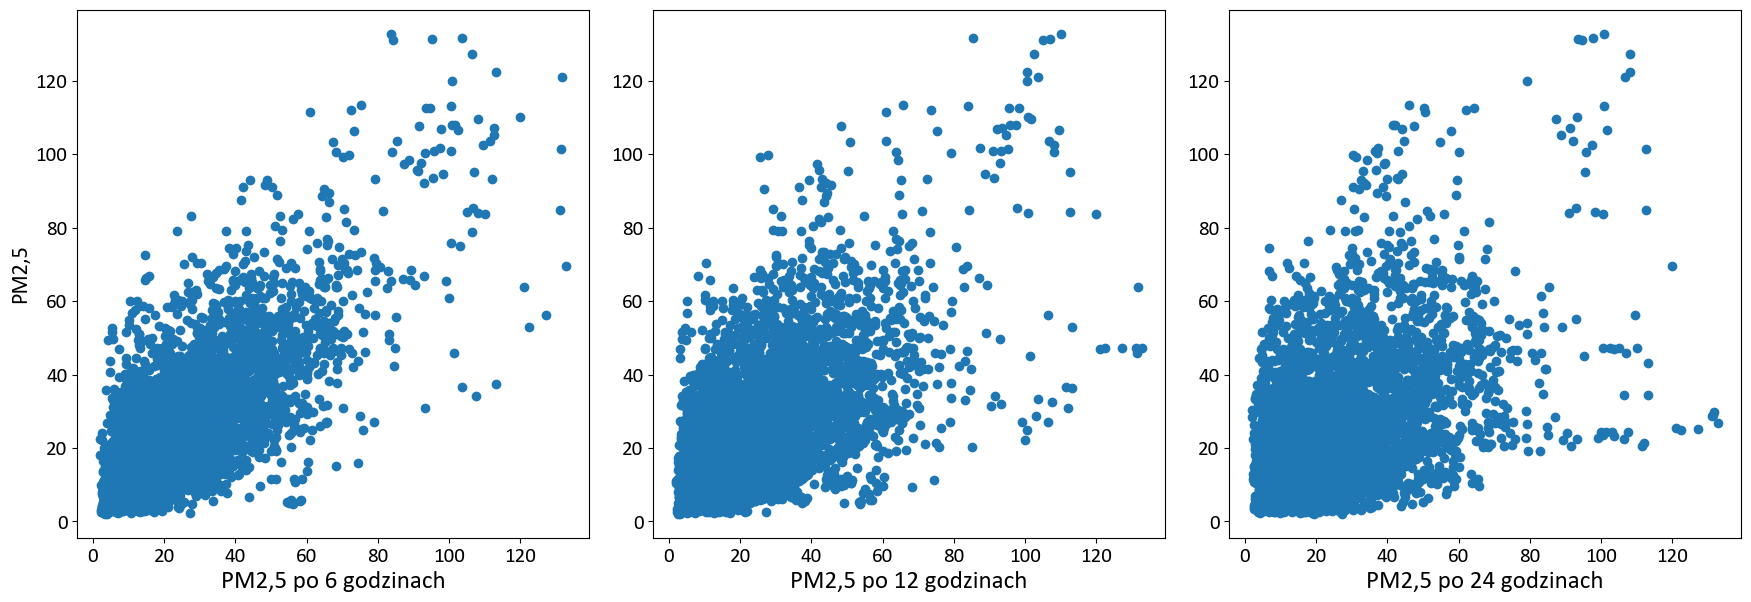

In [47]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,0.8,1.1])
ax1 = fig.add_axes([0.9,0,0.8,1.1])
ax2 = fig.add_axes([1.8,0,0.8,1.1])
ax0.scatter(data06[:,9], data06[:,0])
ax0.set_ylabel('PM2,5', fontsize=16)
ax0.set_xlabel('PM2,5 po 6 godzinach', fontsize=18)
ax1.scatter(data12[:,9], data12[:,0])
ax1.set_xlabel('PM2,5 po 12 godzinach', fontsize=18)
ax2.scatter(data24[:,9], data24[:,0])
ax2.set_xlabel('PM2,5 po 24 godzinach', fontsize=18)

Text(0.5, 0, 'PM2,5')

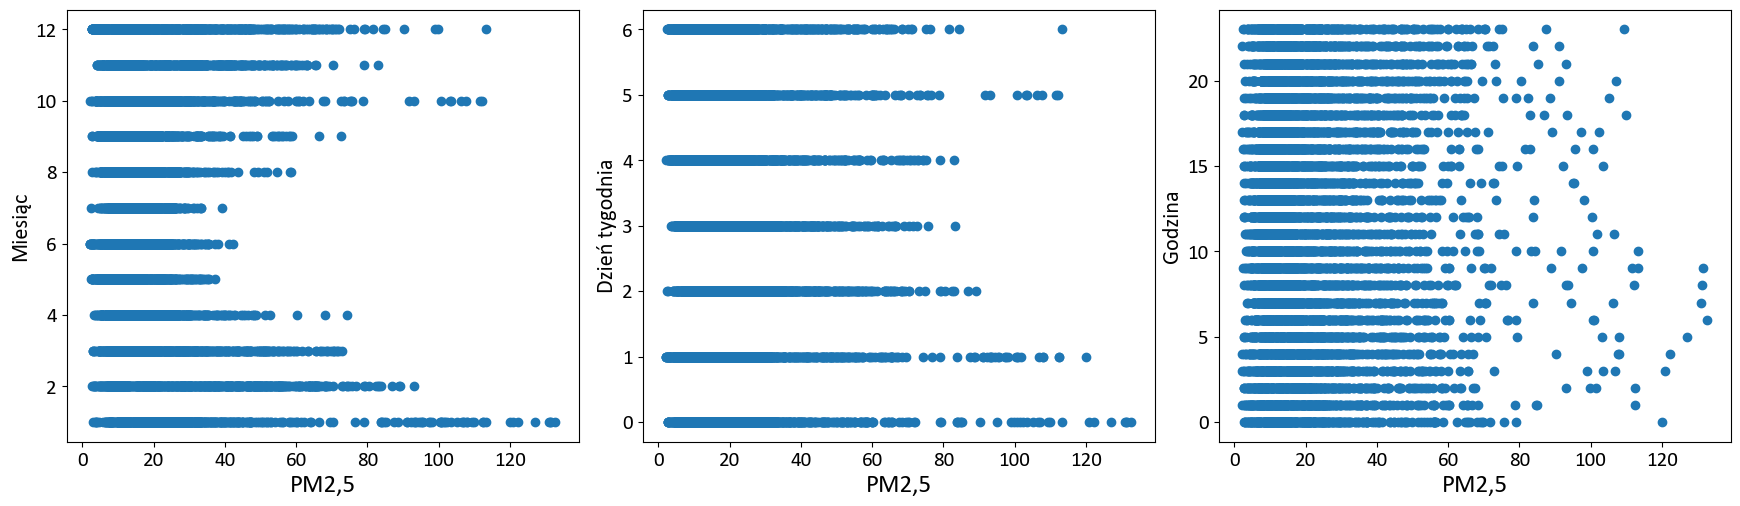

In [48]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,0.8,0.9])
ax1 = fig.add_axes([0.9,0,0.8,0.9])
ax2 = fig.add_axes([1.8,0,0.8,0.9])
ax0.scatter(data06[:,0], data06[:,1])
ax0.set_ylabel('Miesiąc', fontsize=16)
ax0.set_xlabel('PM2,5', fontsize=18)
ax1.scatter(data06[:,0], data06[:,2])
ax1.set_ylabel('Dzień tygodnia', fontsize=16)
ax1.set_xlabel('PM2,5', fontsize=18)
ax2.scatter(data06[:,0], data06[:,3])
ax2.set_ylabel('Godzina', fontsize=16)
ax2.set_xlabel('PM2,5', fontsize=18)

Text(0.5, 0, 'PM2,5')

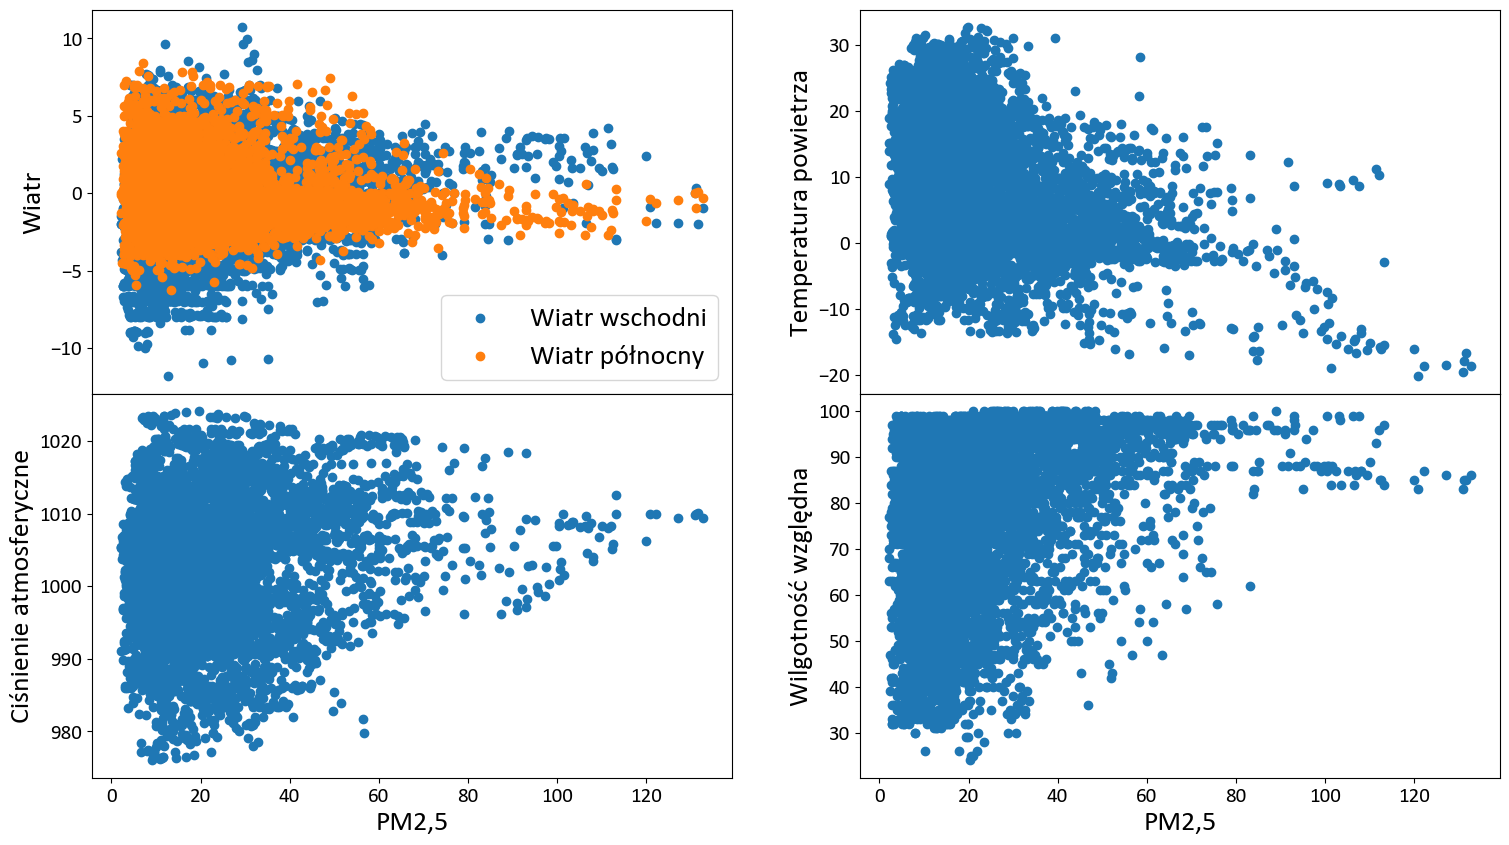

In [49]:
fig = plt.figure()
ax0 = fig.add_axes([0,0.8,1,0.8])
ax1 = fig.add_axes([1.2,0.8,1,0.8])
ax2 = fig.add_axes([0,0,1,0.8])
ax3 = fig.add_axes([1.2,0,1,0.8])
ax0.scatter(data06[:,0], data06[:,4])
ax0.scatter(data06[:,0], data06[:,5])
ax0.set_ylabel('Wiatr', fontsize=20)
ax0.set_xlabel('PM2,5', fontsize=20)
ax0.legend(["Wiatr wschodni", "Wiatr północny"], fontsize=20, loc='lower right')
ax1.scatter(data06[:,0], data06[:,6])
ax1.set_ylabel('Temperatura powietrza', fontsize=20)
ax1.set_xlabel('PM2,5', fontsize=20)
ax2.scatter(data06[:,0], data06[:,7])
ax2.set_ylabel('Ciśnienie atmosferyczne', fontsize=20)
ax2.set_xlabel('PM2,5', fontsize=20)
ax3.scatter(data06[:,0], data06[:,8])
ax3.set_ylabel('Wilgotność względna', fontsize=20)
ax3.set_xlabel('PM2,5', fontsize=20)

### Violin plots

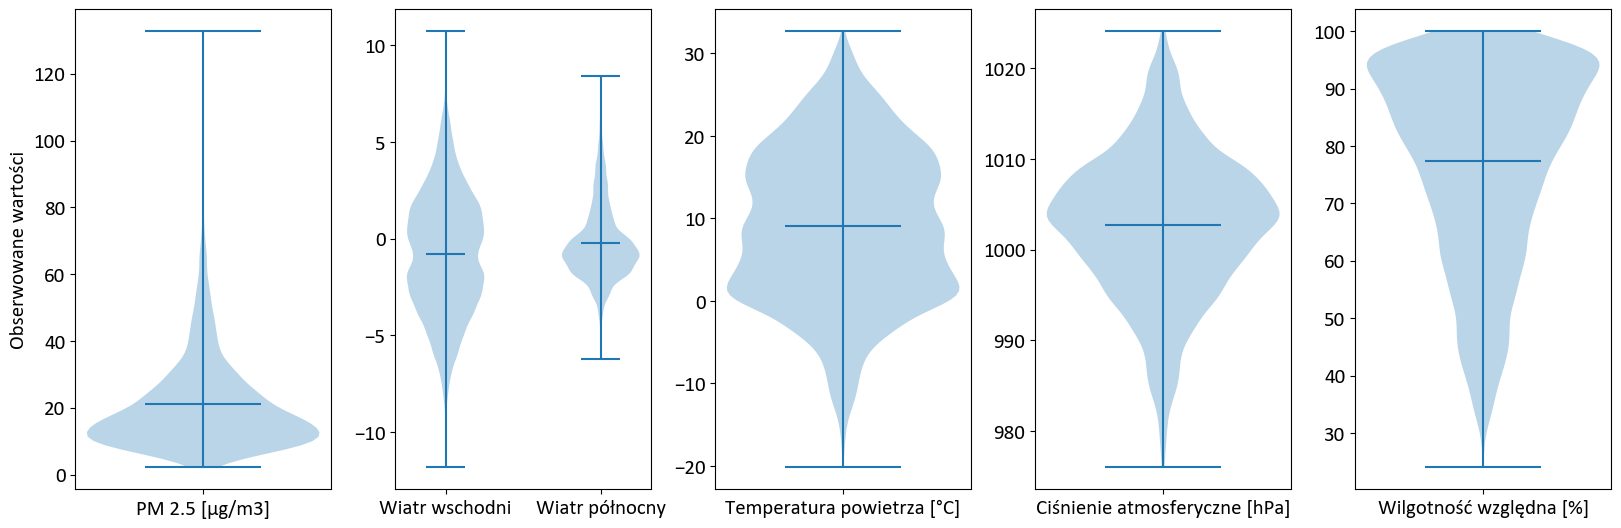

In [50]:
# Preparing violin plot
data_to_plot = target06.to_numpy()

fig = plt.figure()
ax0 = fig.add_axes([0,0,0.4,1])
ax1 = fig.add_axes([0.5,0,0.4,1])
ax2 = fig.add_axes([1.0,0,0.4,1])
ax3 = fig.add_axes([1.5,0,0.4,1])
ax4 = fig.add_axes([2.0,0,0.4,1])

ax0.violinplot([data_to_plot[:,0]], showmeans=True)
ax1.violinplot([data_to_plot[:,4], data_to_plot[:,5]], showmeans=True)
ax2.violinplot([data_to_plot[:,6]], showmeans=True)
ax3.violinplot([data_to_plot[:,7]], showmeans=True)
ax4.violinplot([data_to_plot[:,8]], showmeans=True)
ax0.set_ylabel('Obserwowane wartości')
ax0.set_xticks([1], labels = ['PM 2.5 [µg/m3]'])
ax1.set_xticks([1, 2], labels = ['Wiatr wschodni', 'Wiatr północny'])
ax2.set_xticks([1], labels = ['Temperatura powietrza [°C]'])
ax3.set_xticks([1], labels = ['Ciśnienie atmosferyczne [hPa]'])
ax4.set_xticks([1], labels = ['Wilgotność względna [%]'])

plt.show()